In [4]:
!pip install pandas
!pip install matplotlib
!pip install scipy

  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_x86_64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.9 MB/s  0:00:01a 0:00:0136m0:00:01:01
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_x86_64.whl (6.9 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]━━━━ 3/4 [pandas]
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp39-cp39-macosx_10_10_x86_64.whl.metadata (9.0 kB)
  Using cached importlib_resources-6.5.2-py3-n

In [17]:
!which python

/Users/phuchoang/Documents/University/FirstSem/DATA_ANALYTICS_IN_BUSINESS/lab/lab1/code/.venv/bin/python


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [11]:
csv_file = "VNZ_STOCK_DATA_AUGUST.csv"
df = pd.read_csv(csv_file)

In [12]:
column = "Total Value"
data = df[column].dropna()

In [18]:
stats = {
    "Trung binh cong": data.mean(),
    "So trung vi": data.median(),
    "mode": data.mode().tolist(),
    "Tu phan vi": data.quantile([0.25, 0.5, 0.75]),
    "Phuong sai": data.var(),
    "Do lech chuan": data.std(),
    "Khoang gia tri": data.max() - data.min(),
    "Sai so chuan": data.sem(),
    "skewness": skew(data, bias=False),
    "kurtosis": kurtosis(data, bias=False)
}

In [20]:
print(f"Descriptive Statistics for '{column}':")
print("-" * 50)
print(f"Mean: {stats['Trung binh cong']}")
print(f"Median: {stats['So trung vi']}")
print(f"Mode: {stats['mode']}")
print(f"Quartiles:\n{stats['Tu phan vi']}\n")
print("--- Dispersion ---")
print(f"Variance: {stats['Phuong sai']}")
print(f"Standard Deviation: {stats['Do lech chuan']}")
print(f"Range: {stats['Khoang gia tri']}")
print(f"Standard Error of Mean: {stats['Sai so chuan']}\n")
print("--- Shape ---")
print(f"Skewness: {stats['skewness']}")
print(f"Kurtosis: {stats['kurtosis']}")


Descriptive Statistics for 'Total Value':
--------------------------------------------------
Mean: 469.8181818181818
Median: 316.5
Mode: [1, 2, 25, 53, 58, 158, 159, 185, 215, 218, 285, 348, 374, 380, 422, 473, 628, 667, 694, 882, 1116, 2993]
Quartiles:
0.25    158.25
0.50    316.50
0.75    589.25
Name: Total Value, dtype: float64

--- Dispersion ---
Variance: 405701.7748917748
Standard Deviation: 636.9472308533689
Range: 2992
Standard Error of Mean: 135.7976058986606

--- Shape ---
Skewness: 3.2158915332099913
Kurtosis: 12.301393752097875


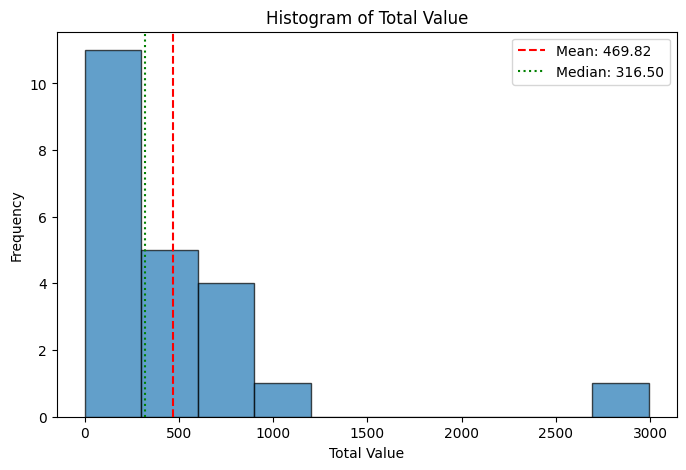

In [15]:
#Histogram
mean = stats['mean']
median = stats['median']

plt.figure(figsize=(8, 5))
plt.hist(data, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dotted', linewidth=1.5, label=f'Median: {median:.2f}')
plt.title(f"Histogram of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.legend()
plt.show()

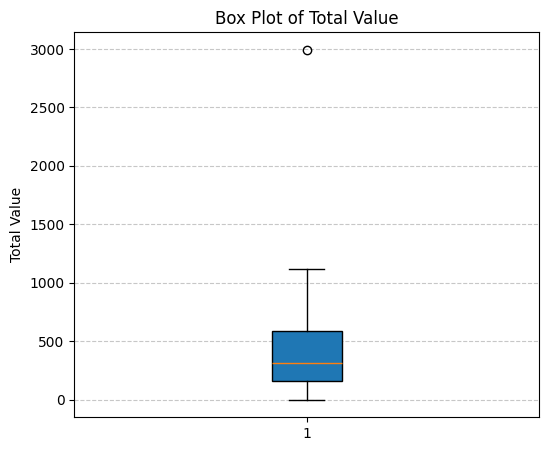

In [16]:
#Boxplot
plt.figure(figsize=(6, 5))
plt.boxplot(data, vert=True, patch_artist=True)
plt.title(f"Box Plot of {column}")
plt.ylabel(column)
plt.grid(axis='y', linestyle='--', alpha=0.7)